In [2]:
import pandas as pd

df = pd.read_csv('data.csv', header=[0,1], index_col=[0]).reset_index(drop=True)
df

accel                           gyro                            mag  \
             x         y          z         x         y         z          x   
0    -1.192331  2.236219  -9.483578 -0.013341 -0.036044 -0.018854  44.203568   
1    -1.192331  2.236219  -9.483578 -0.013341 -0.036044 -0.018854  44.203568   
2    -1.192331  2.236219  -9.483578 -0.013341 -0.036044 -0.018854  44.203568   
3    -1.192331  2.236219  -9.483578 -0.013341 -0.036044 -0.018854  44.203568   
4    -1.192331  2.236219  -9.483578 -0.013341 -0.036044 -0.018854  44.203568   
...        ...       ...        ...       ...       ...       ...        ...   
4255 -0.574617  1.740611 -10.244946  0.007166 -0.111945  0.067966  41.576201   
4256 -0.574617  1.740611 -10.244946  0.007166 -0.111945  0.067966  41.576201   
4257 -0.574617  1.740611 -10.244946  0.007166 -0.111945  0.067966  41.576201   
4258 -0.574617  1.740611 -10.244946  0.007166 -0.111945  0.067966  41.576201   
4259 -0.574617  1.740611 -10.244946  0.007166 -0.111945  0.067966  41.576201   

                                                                            q  
              y          z                                Unnamed: 10_level_1  
0    -11.340037  45.217584  [ 0.00294132 -0.60259825 -0.79547429 -0.06393232]  
1    -11.340037  45.217584  [ 0.00294132 -0.60259825 -0.79547429 -0.06393232]  
2    -11.340037  45.217584  [ 0.00294132 -0.60259825 -0.79547429 -0.06393232]  
3    -11.340037  45.217584  [ 0.00294132 -0.60259825 -0.79547429 -0.06393232]  
4    -11.340037  45.217584  [ 0.00294132 -0.60259825 -0.79547429 -0.06393232]  
...         ...        ...                                                ...  
4255   2.548464  55.824087  [ 0.00294132 -0.60259825 -0.79547429 -0.06393232]  
4256   2.548464  55.824087  [ 0.00294132 -0.60259825 -0.79547429 -0.06393232]  
4257   2.548464  55.824087  [ 0.00294132 -0.60259825 -0.79547429 -0.06393232]  
4258   2.548464  55.824087  [ 0.00294132 -0.60259825 -0.79547429 -0.06393232]  
4259   2.548464  55.824087  [ 0.00294132 -0.60259825 -0.79547429 -0.06393232]  

[4260 rows x 10 columns]

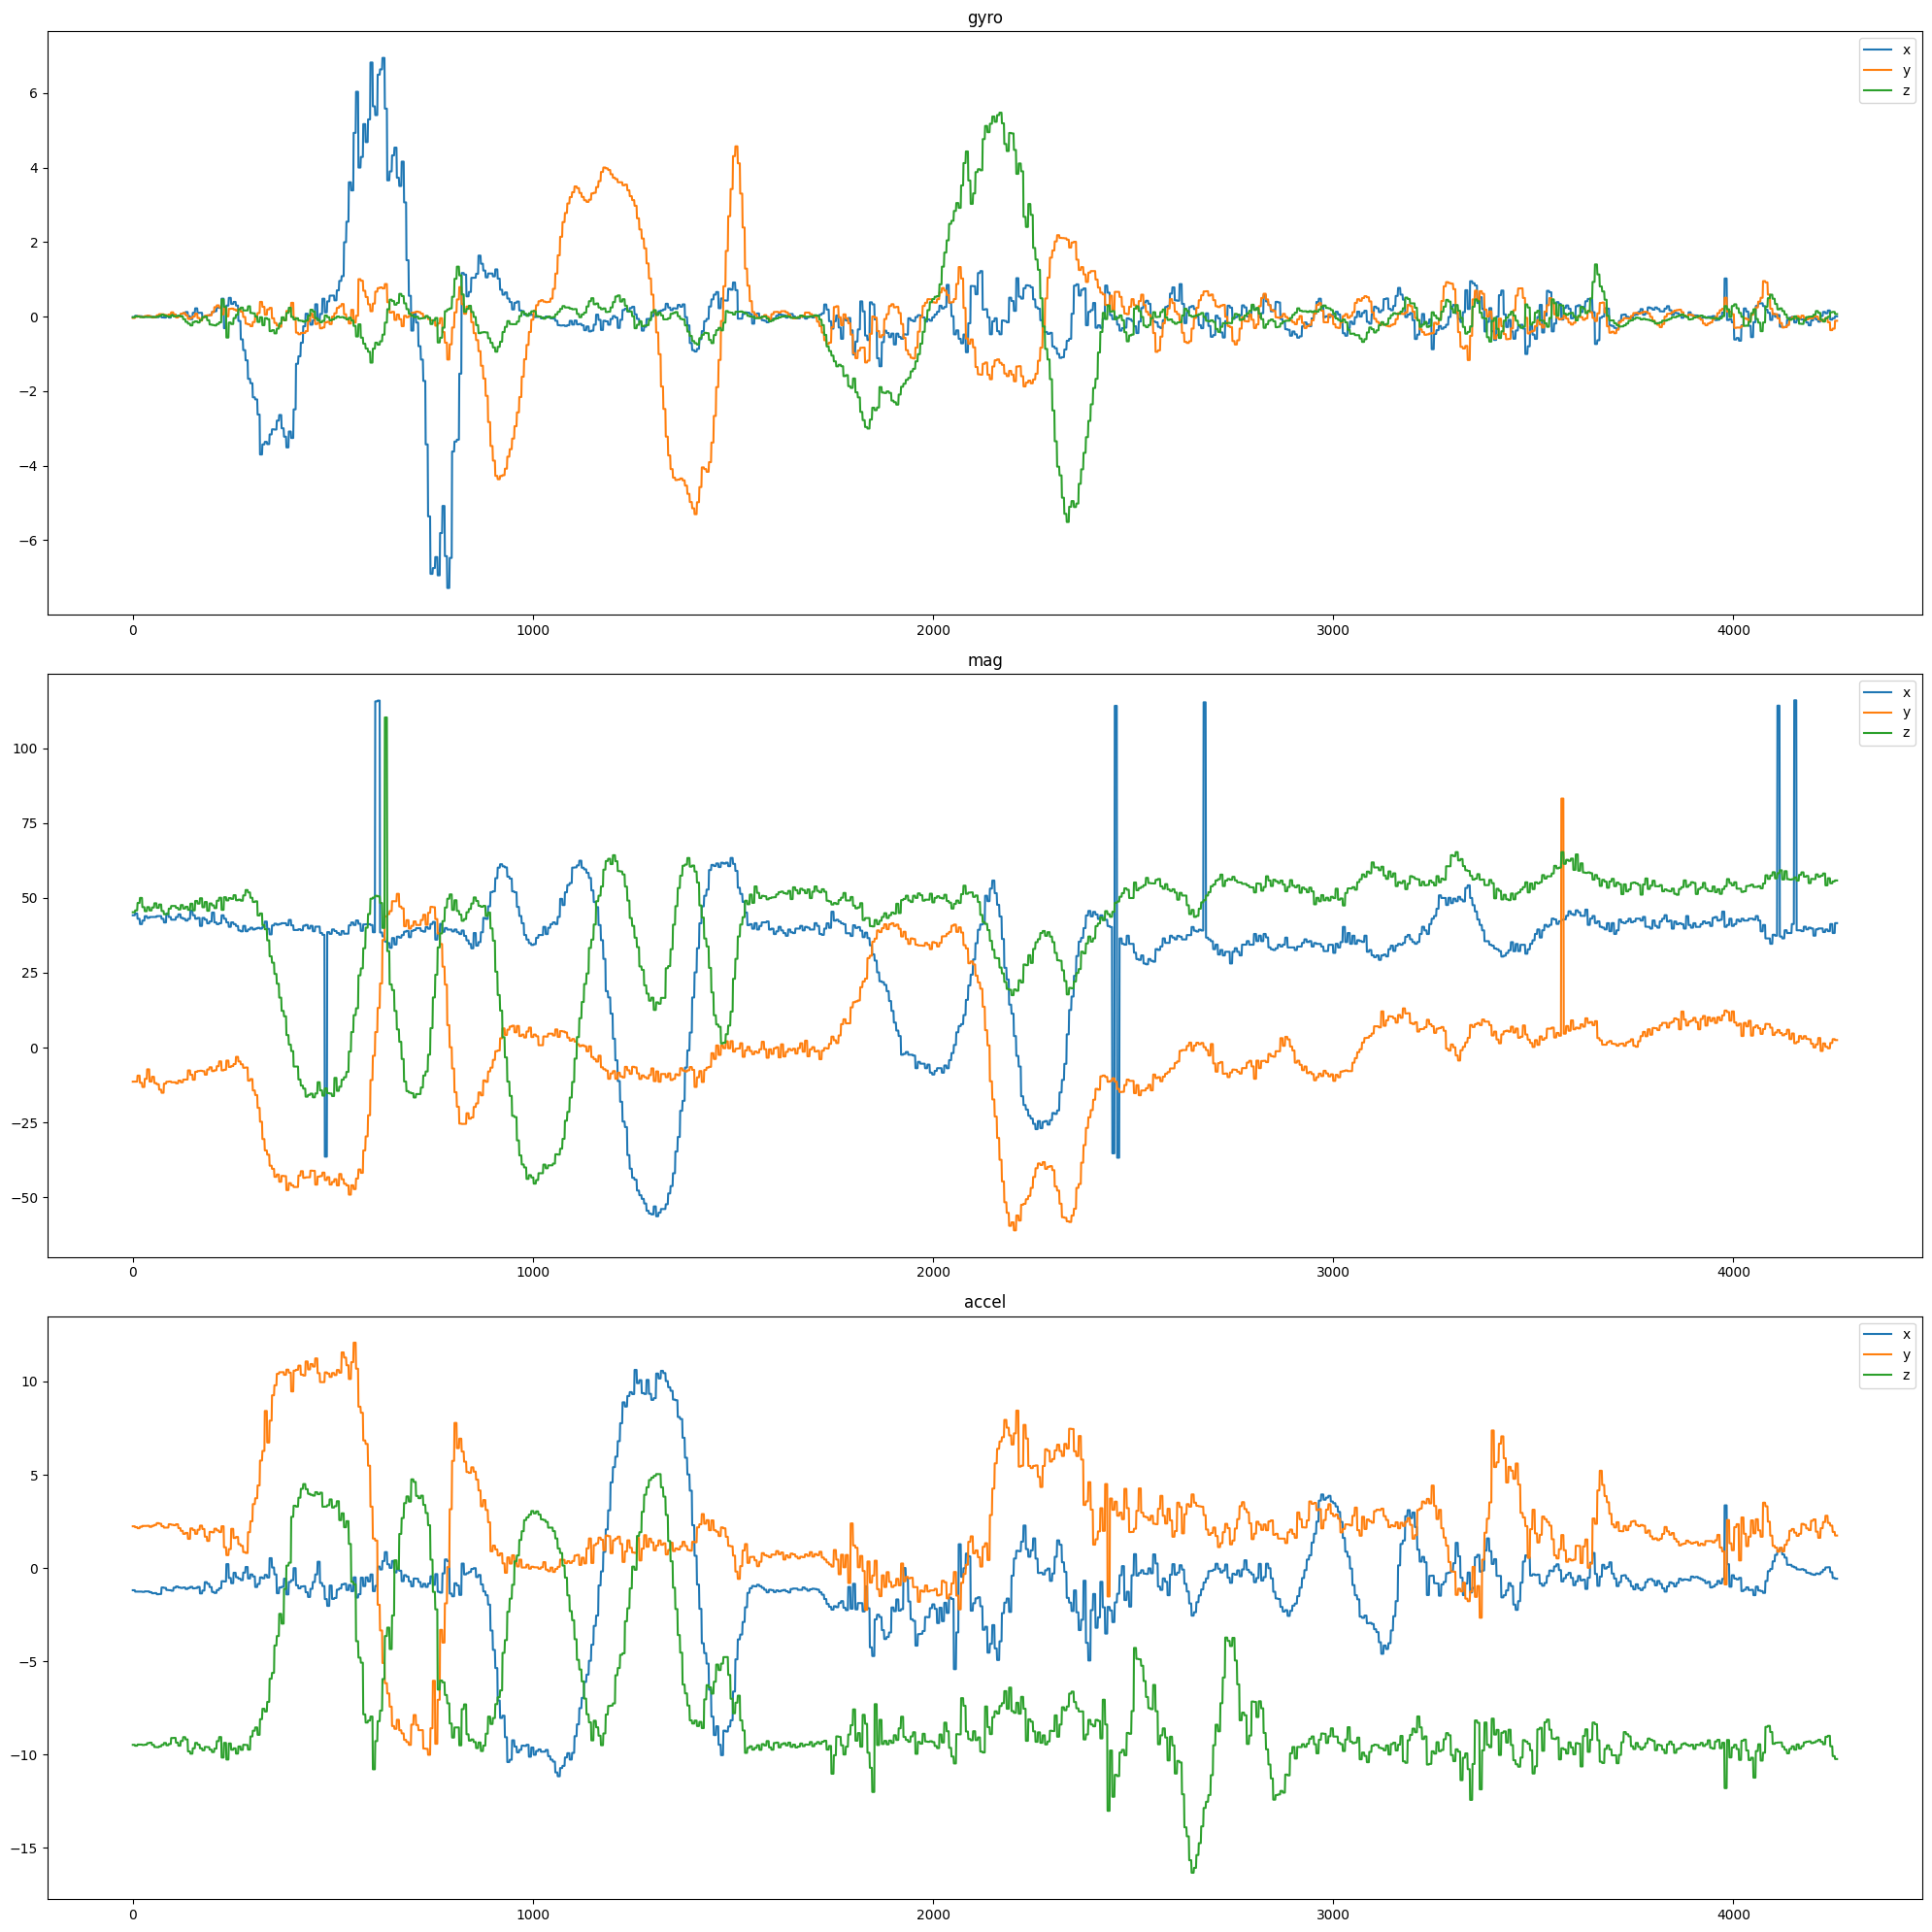

In [4]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(3, 1, figsize=(20, 20), tight_layout=True)

# set matpltoblb style to light mode
plt.style.use('default')

ax[0].plot(df['gyro'])
ax[0].set_title('gyro')
ax[0].legend(['x', 'y', 'z'])

ax[1].plot(df['mag'])
ax[1].set_title('mag')
ax[1].legend(['x', 'y', 'z'])

ax[2].plot(df['accel'])
ax[2].set_title('accel')
ax[2].legend(['x', 'y', 'z'])


plt.show()

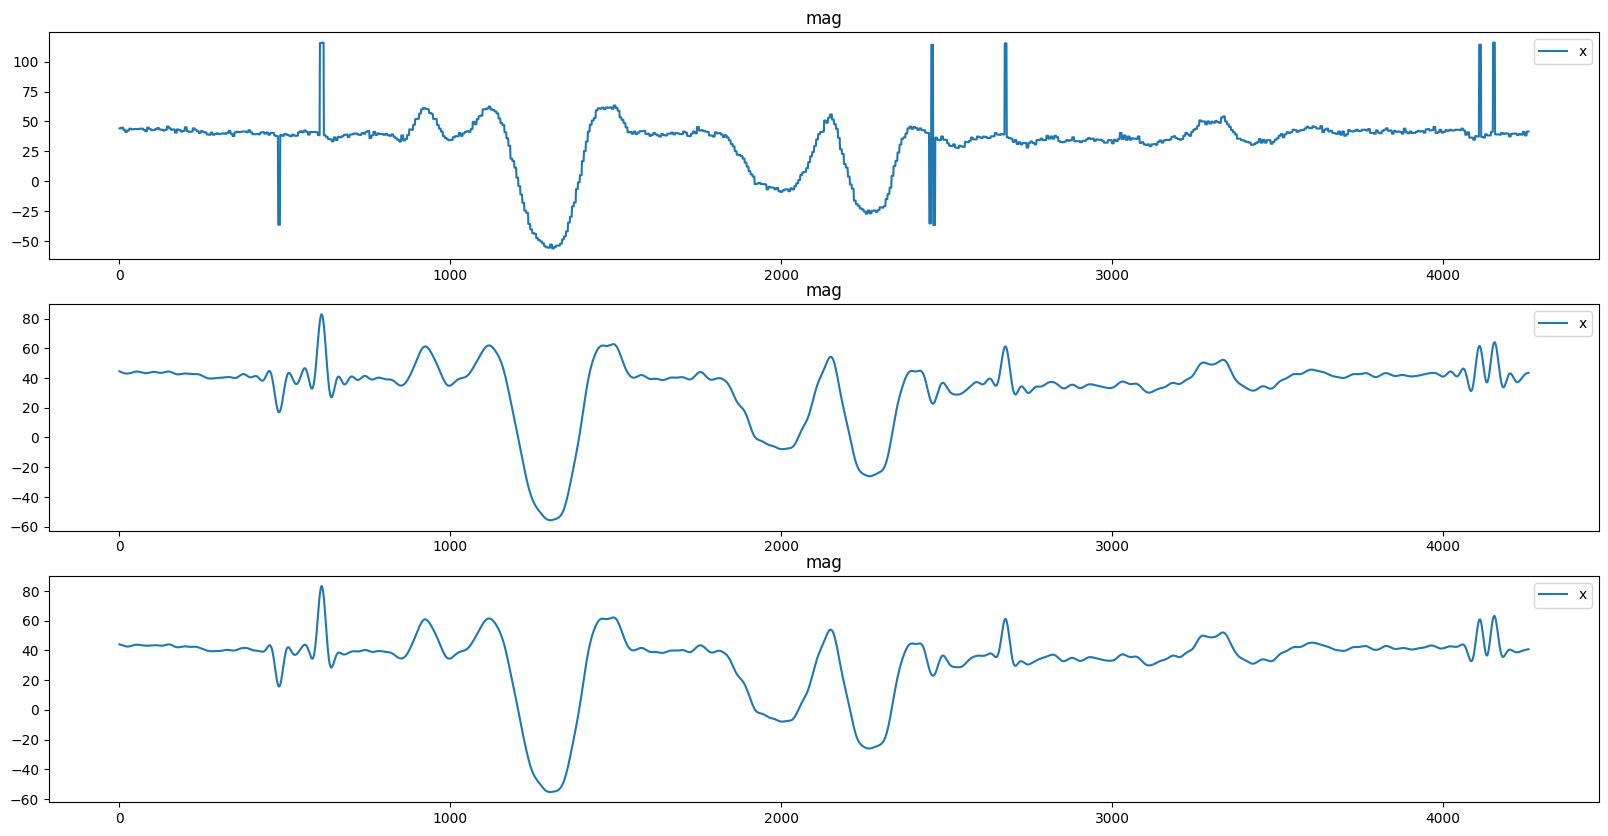

In [16]:
# low pass filter over mag Y axis
from scipy import signal

# increase plot size
_, ax = plt.subplots(3, 1, figsize=(20, 10))
ax[0].plot(df['mag']['x'])
ax[0].set_title('mag')
ax[0].legend(['x'])
b, a = signal.butter(13, 5, fs=200, btype='lowpass', analog=False)
ax[1].plot(signal.filtfilt(b, a, df['mag']['x'].copy()))
ax[1].set_title('mag')
ax[1].legend(['x'])
b, a = signal.butter(5, 5, fs=200, btype='lowpass', analog=False)
ax[2].plot(signal.filtfilt(b, a, df['mag']['x'].copy()))
ax[2].set_title('mag')
ax[2].legend(['x'])
plt.show()

In [ ]:
%cd ..

c:\Users\arada\Documents\Projects\Uni\final project\MARG Dead-reckoning


In [ ]:

import pandas as pd
import itertools

dt = 1/200
# df = pd.DataFrame({'x':[1,0]*3, 'y':[2,0]*3, 'z':[3,0]*3}, index=[0, 1, 2, 3, 4, 5])
df = pd.read_csv('true_accel.csv', index_col=0)
df.columns = tuple(itertools.product(['accel'], ['x', 'y', 'z']))

sf = df.shift(1).apply(lambda x: x * dt)
sf.columns = (('vel', 'x'), ('vel', 'y'), ('vel', 'z'))
sf = sf.cumsum()
df = pd.concat([df, sf], axis=1)
df.fillna(0, inplace=True)

sf = pd.DataFrame(0, index=df.index, columns=(('pos', 'x'), ('pos', 'y'), ('pos', 'z')))
df = pd.concat([df, sf], axis=1)
df['pos'] = df['vel'].shift(1) * dt + df['accel'].shift(1) * (dt ** 2) / 2
df.fillna(0, inplace=True)
df['pos'] = df['pos'].cumsum()

# sf = pd.DataFrame(0, index=df.index, columns=(('pos_v', 'x'), ('pos_v', 'y'), ('pos_v', 'z')))
# df = pd.concat([df, sf], axis=1)
# df['pos_v'] = df.apply(lambda x: x['accel'] * (x.name ** 2) / 2, axis=1)
df

accel                           vel                               pos  \
           x         y         z         x          y           z          x   
0  -0.588766 -1.964956 -9.379931  0.000000   0.000000    0.000000   0.000000   
1  -0.568387 -1.978258 -9.357815 -0.002944  -0.009825   -0.046900  -0.000007   
2  -0.553653 -1.979307 -9.343102 -0.005786  -0.019716   -0.093689  -0.000029   
3  -0.544457 -1.968544 -9.335867 -0.008554  -0.029613   -0.140404  -0.000065   
4  -0.540560 -1.946671 -9.335979 -0.011276  -0.039455   -0.187084  -0.000115   
..       ...       ...       ...       ...        ...         ...        ...   
1  -0.259913  0.094974 -9.531057  4.230844 -10.989828 -145.896142  40.751747   
2  -0.271991  0.108923 -9.529201  4.229544 -10.989353 -145.943798  40.772898   
3  -0.283325  0.121488 -9.526645  4.228184 -10.988808 -145.991444  40.794042   
4  -0.293706  0.132399 -9.523441  4.226767 -10.988201 -146.039077  40.815180   
5  -0.302945  0.141412 -9.519650  4.225299 -10.987539 -146.086694  40.836310   

                             
             y            z  
0     0.000000     0.000000  
1    -0.000025    -0.000117  
2    -0.000098    -0.000469  
3    -0.000222    -0.001054  
4    -0.000394    -0.001873  
..         ...          ...  
1  -129.677153 -1103.009606  
2  -129.732101 -1103.739206  
3  -129.787046 -1104.469044  
4  -129.841989 -1105.199121  
5  -129.896928 -1105.929435  

[3030 rows x 9 columns]

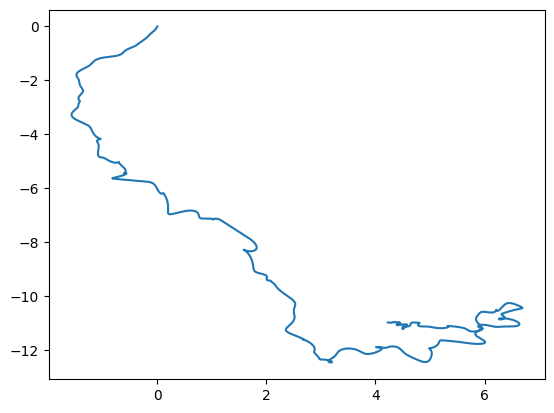

In [ ]:
# draw pos for x, y, z in 3d
plt.plot(df['vel']['x'], df['vel']['y'])
plt.show()